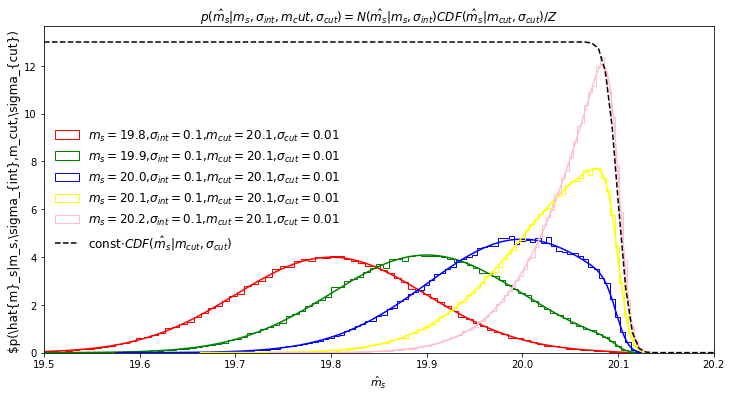

In [1]:
from SkewNormalPlus import SkewNormalPlus
from matplotlib import pyplot as plt
import jax.random as random
import jax.numpy as jnp

import numpy as np
from scipy.stats import norm

seed=21

mu=jnp.array([19.8,19.9,20,20.1,20.2])
sigma_int=0.1

sigma_cut=0.01
mu_cut= 20.1



rng_key = random.PRNGKey(seed)


snp = SkewNormalPlus(m_int=mu,sigma_int=sigma_int,m_cut=mu_cut,sigma_cut=sigma_cut)

c=['red','green','blue','yellow','pink']
samps=snp.sample(rng_key,(100000,5))
plt.figure(figsize=(12,6))



sor = jnp.sort(samps,axis=0)
pro =jnp.exp(snp.log_prob(sor))

for i in range(samps.shape[1]):

    plt.hist(samps[:,i],bins=100,density=True,histtype='step',color=c[i],label='$m_s=$'+str(mu[i])+',$\sigma_{int}=$'+str(sigma_int)+',$m_{cut}=$'+str(mu_cut)+',$\sigma_{cut}=$'+str(sigma_cut))


    plt.plot(sor[:,i],pro[:,i],color=c[i])


n = norm(-mu_cut,sigma_cut)



plt.plot(jnp.linspace(19.5,20.2,100),n.cdf(-jnp.linspace(19.5,20.2,100))*13,label='const$\cdot CDF(\hat{m}_s|m_{cut},\sigma_{cut})$',color='black',linestyle='--')



plt.xlim(19.5,20.2)

plt.legend(loc='center left',frameon=False,fontsize=12)
plt.xlabel('$\hat{m}_s$',fontsize=11)
plt.ylabel('$p(\hat{m}_s|m_s,\sigma_{int},m_cut,\sigma_{cut})',fontsize=12)
plt.title('$p(\hat{m}_s|m_s,\sigma_{int},m_cut,\sigma_{cut})=N(\hat{m_s}|m_s,\sigma_{int})CDF(\hat{m}_s|m_{cut},\sigma_{cut})/Z$',fontsize=12)



plt.show()
